# 實作乳癌診斷，並繪製ROC曲線

## 載入套件

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

## 載入資料

In [2]:
data = datasets.load_breast_cancer()

In [3]:
print(data.data.shape)

(569, 30)


## 資料分割

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(data.data[:,:6], data.target, 
                     test_size=0.20)

## 模型訓練

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), SVC(probability=True))

pipe.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


## 模型預測

In [6]:
y_pred_proba = pipe.predict_proba(X_test)
np.around(y_pred_proba, 2)

array([[0.04, 0.96],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.2 , 0.8 ],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.03, 0.97],
       [0.06, 0.94],
       [0.3 , 0.7 ],
       [0.08, 0.92],
       [0.08, 0.92],
       [0.87, 0.13],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.42, 0.58],
       [0.95, 0.05],
       [0.66, 0.34],
       [0.98, 0.02],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.15, 0.85],
       [0.01, 0.99],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.09, 0.91],
       [0.16, 0.84],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.78, 0.22],
       [0.94, 0.06],
       [0.99, 0.01],
       [0.01,

## 預測值(第2欄)與實際值合併

In [7]:
df = pd.DataFrame({'predict':np.around(y_pred_proba[:,1], 2), 'actual':y_test})
df

,predict,actual
0,0.96,1
1,0.98,1
2,0.99,1
3,0.98,1
4,0.97,1
...,...,...
109,0.98,1
110,0.70,0
111,0.04,0
112,0.01,0


## 依預測值降冪排序

In [8]:
df2=df.sort_values(by='predict', ascending=False)# 大到小排序
df2

,predict,actual
12,0.99,1
51,0.99,1
47,0.99,1
93,0.99,1
97,0.99,1
...,...,...
31,0.00,0
36,0.00,0
40,0.00,0
72,0.00,0


## 繪製ROC曲線

Text(0.5, 0, '偽陽率')

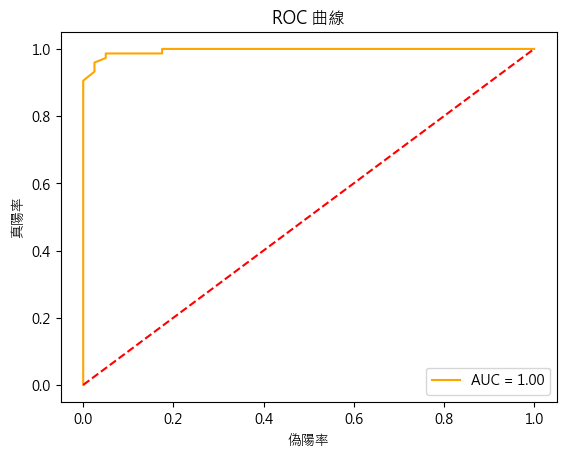

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# 修正中文亂碼 
#plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  
plt.rcParams["font.family"] = ["Microsoft JhengHei"]
plt.rcParams['axes.unicode_minus'] = False

fpr, tpr, threshold = roc_curve(df['actual'], df['predict'])
auc1 = auc(fpr, tpr)
plt.title('ROC 曲線')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('真陽率')
plt.xlabel('偽陽率')

In [10]:
roc_auc_score(df2.actual, df2.predict)

0.9954391891891892